# PyTorch custom dataset 

## Import PyTorch and setup device agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.6.0+cu126'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Get Data

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists, skipping download")
else:
    print(f"{image_path} directory not found, creating one")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

# Unzip pizza steak sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping the data")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists, skipping download
Unzipping the data


## Becoming one with the data (Data preparation and exploration)

In [4]:
import os

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)}, images in {dirpath}")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0, images in data\pizza_steak_sushi
There are 3 directories and 0, images in data\pizza_steak_sushi\test
There are 1 directories and 25, images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 1, images in data\pizza_steak_sushi\test\pizza\.ipynb_checkpoints
There are 0 directories and 19, images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31, images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0, images in data\pizza_steak_sushi\train
There are 0 directories and 78, images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75, images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72, images in data\pizza_steak_sushi\train\sushi


In [7]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### Visualizing an image

Random image path is data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class : sushi
Image height: 408
Image width: 512


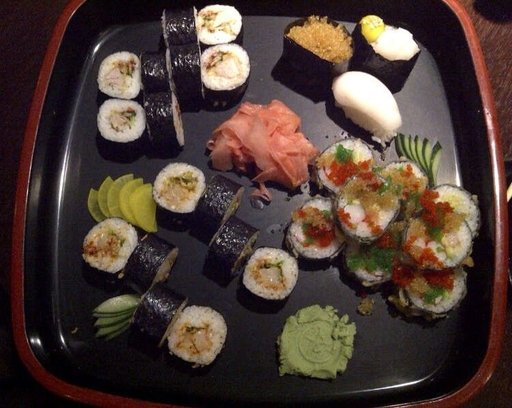

In [13]:
import random
from PIL import Image

# Set seed
random.seed(42)

# Let's get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a rnadom image path
random_image_path = random.choice(image_path_list)

# Get image class from path name (the image class in name of directory where the image is stored)
image_class = random_image_path.parent.stem

# Open image 
img = Image.open(random_image_path)

# Print metadata 
print(f"Random image path is {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

(-0.5, 511.5, 407.5, -0.5)

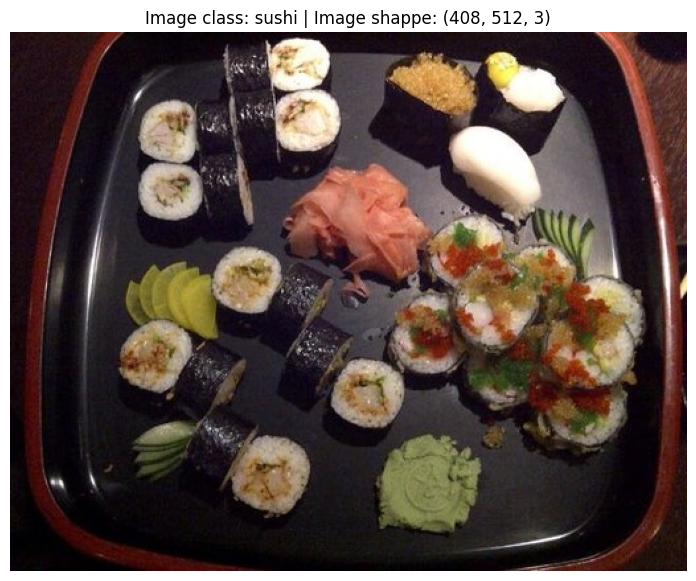

In [15]:
# Try to visualize the image with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into and array
image_as_array = np.asarray(img)

# PLot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shappe: {image_as_array.shape}")
plt.axis("off")

In [17]:
image_as_array

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[34, 15, 17],
        [31, 12, 14],
        [30, 11, 13],
        ...,
        [19,  9, 17],
        [18,  8, 16],
        [18,  8, 16]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [33, 19, 18],
        [33, 19, 19],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], dtype=uint8)

## Transforming data

- Turn the data into tensors
- Turn it into a `torch.utils.data.Dataset` and subsequently `torch.utils.data.Dataloader`

In [19]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## Transfoming data with torchvision.transforms

In [20]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [22]:
data_transform(img).shape

torch.Size([3, 64, 64])

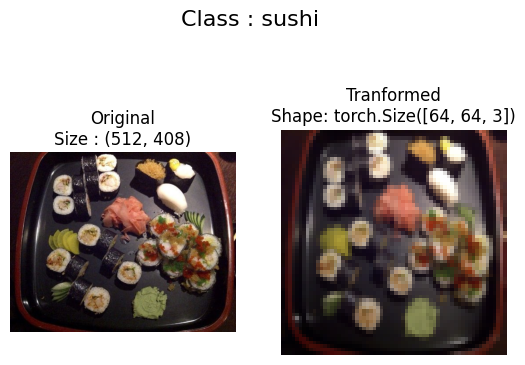

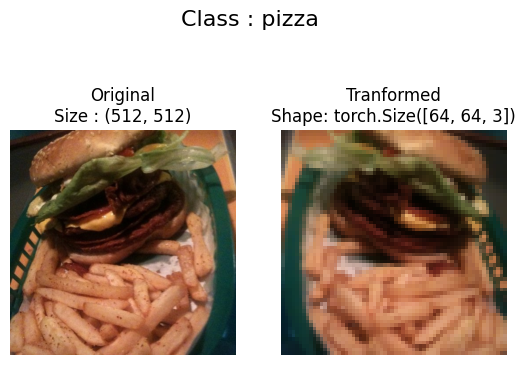

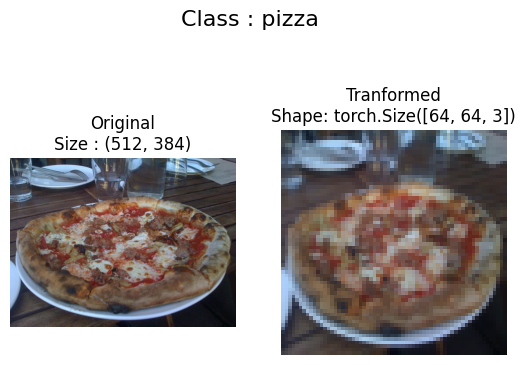

In [27]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images and then plots the 
    original vs tranformed version.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize : {f.size}")
            ax[0].axis("off")

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Tranformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class : {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=42)

## Option 1: Loading image data using `ImageFolder`

In [28]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform, # transform for the data
                                 target_transform=None) # transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 76
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [32]:
# Class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [33]:
# Class names as dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [34]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(225, 76)

In [36]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

torch.Size([64, 64, 3]) torch.Size([3, 64, 64])


Text(0.5, 1.0, 'pizza')

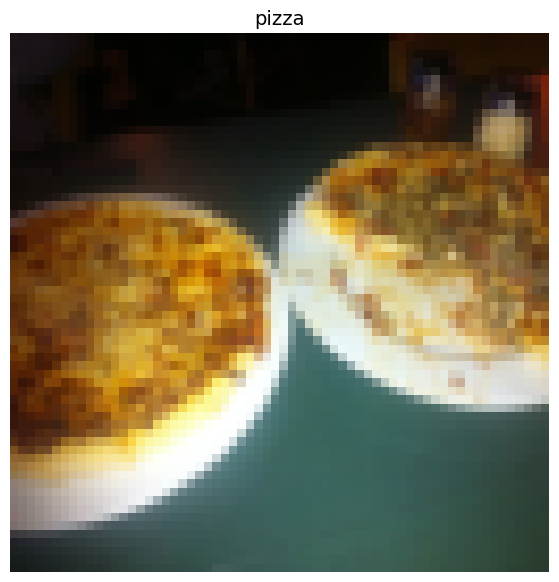

In [39]:
# Rearrange the order of dimensions, because numpy likes color channels at the end
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(img_permute.shape, img.shape)

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## Turn loaded images into `DataLoaders`

A `DataLoader` is going to help us turn our `Dataset` into iterables and we can customize batch_size so our model can see batch_size images at a time.

In [40]:
import os
os.cpu_count()

16

In [49]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             # num_workers=os.cpu_count(),
                              num_workers=1,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            # num_workers=os.cpu_count(),
                             num_workers=1,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1cf88c5a440>,
 <torch.utils.data.dataloader.DataLoader at 0x1cf88c5a170>)

In [50]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [51]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## Loading image data with a custom `Dataset`

- Want to be able to load images from file
- Want to be able to get class names from Dataset
- want to be able to get classes as dictionary

In [53]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List